This is really just example with the flow_from_dataframe function from ImageDataGenerator, and Pandas to read a CSV. The CSV contains filenames (without extensions) and the image class (i.e. dog breed). So basic augmentations using ImageDataGenerator too (flipping, zoom, rotations). We got 0.0234 for val_accuracy before augmentations. Will update the model in later versions.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers



import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
def append_ext(fn):
    return fn+".jpg"

In [3]:
traindf=pd.read_csv('../input/dog-breed-identification/labels.csv',dtype=str)

testdf=pd.read_csv('../input/dog-breed-identification/sample_submission.csv',dtype=str)

In [4]:
traindf["id"]=traindf["id"].apply(append_ext)
testdf["id"]=testdf["id"].apply(append_ext)

In [5]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [6]:
train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="../input/dog-breed-identification/train/",
x_col="id",
y_col="breed",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 7667 validated image filenames belonging to 120 classes.


In [7]:
valid_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="../input/dog-breed-identification/train/",
x_col="id",
y_col="breed",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 2555 validated image filenames belonging to 120 classes.


In [8]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory="../input/dog-breed-identification/test/",
x_col="id",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,100))

Found 10357 validated image filenames.


In [13]:
from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

#missed some I forgot which. Must check up!

In [15]:
model=Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(100,100,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(120,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 102, 102, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 102, 102, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [16]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5)

Epoch 1/5
239/239 [==============================] - 167s 697ms/step - loss: 4.8049 - accuracy: 0.0094 - val_loss: 4.7876 - val_accuracy: 0.0150
Epoch 2/5
239/239 [==============================] - 168s 702ms/step - loss: 4.7806 - accuracy: 0.0124 - val_loss: 4.8026 - val_accuracy: 0.0119
Epoch 3/5
239/239 [==============================] - 167s 700ms/step - loss: 4.7240 - accuracy: 0.0170 - val_loss: 4.7705 - val_accuracy: 0.0202
Epoch 4/5
239/239 [==============================] - 168s 701ms/step - loss: 4.4886 - accuracy: 0.0456 - val_loss: 4.8047 - val_accuracy: 0.0258
Epoch 5/5
239/239 [==============================] - 169s 705ms/step - loss: 3.9524 - accuracy: 0.1011 - val_loss: 4.5865 - val_accuracy: 0.0234


So using flipping, zooms, and rotations for data augmentation. Then show some images afterwards. Do we get validation set accuracy above 0.0234 after 5 epochs? Note the model is actually not good!

In [17]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

In [18]:
train_generator=image_gen_train.flow_from_dataframe(
dataframe=traindf,
directory="../input/dog-breed-identification/train/",
x_col="id",
y_col="breed",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(100,100))

Found 10222 validated image filenames belonging to 120 classes.


In [21]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

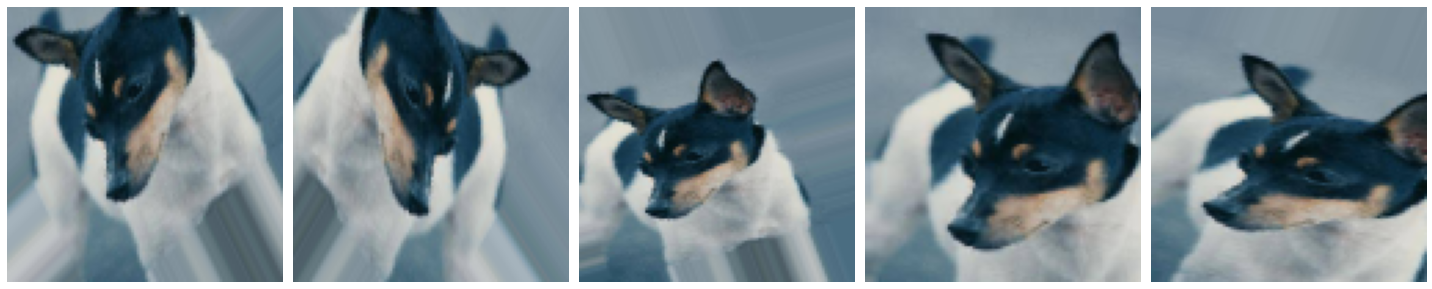

In [22]:
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5)

Epoch 1/5
319/319 [==============================] - 248s 776ms/step - loss: 4.6946 - accuracy: 0.0184 - val_loss: 4.4943 - val_accuracy: 0.0261
Epoch 2/5
319/319 [==============================] - 239s 748ms/step - loss: 4.6342 - accuracy: 0.0238 - val_loss: 4.5604 - val_accuracy: 0.0273
Epoch 3/5
279/319 [=========================>....] - ETA: 26s - loss: 4.6032 - accuracy: 0.0256